In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.visualization import plot_histogram

from qiskit_ibm_provider import IBMProvider
from qiskit_aer.backends.aer_simulator import AerSimulator
from qiskit_aer.noise import NoiseModel

In [ ]:
api_token = ('API_TOKEN')
IBMQ.enable_account(api_token)
provider = IBMProvider(token=api_token)


## Question 1
In Tutorial 9 we found that the circuit presented in Fig. 1 generates one of the Bell’s states (one of
the maximally entangled states) at the output. How should the circuit be modified (what gates added
or changed) to generate the other three Bell’s states? Model the four circuits in Qiskit using the
ideal state vector simulator and the state vector simulator with noise. Is there a difference in the result?
Why

In [ ]:
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

# Get a real backend from a real provider
real_backend = provider.get_backend('ibm_lagos')
noise_model = NoiseModel.from_backend(real_backend)


# Use Aer's qasm_simulator when using measurement
backend_qasm = Aer.get_backend('qasm_simulator')
backend_ideal = Aer.get_backend('statevector_simulator')

# Get coupling map from backend
coupling_map = real_backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend_sim = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)

num_shots    = 1024

def IdealStateVSim():
    job_task2     = backend_ideal.run(circuit)

    result_task2  = job_task2.result()
    output_task2  = result_task2.get_statevector(circuit)
    print(output_task2)

def IdealStateVSimMeasurement():
    job_qasm     = backend_qasm.run(transpile(circuit, backend_qasm), shots=num_shots)

    # Grab the results from the job.
    result_sim   = job_qasm.result()
    counts       = result_sim.get_counts(circuit)
    for key in counts.keys():
        print("P(" + str(key) + ") = " + str(counts[key]/num_shots))

    return(counts)

def Noise():
    job_noisy    = backend_sim.run(transpile(circuit, backend_sim), shots=num_shots)

    # Grab the results from the job.
    result_sim   = job_noisy.result()
    counts       = result_sim.get_counts(circuit)
    for key in counts.keys():
        print("P(" + str(key) + ") = " + str(counts[key]/num_shots))

    return(counts)

In [ ]:
circuit = QuantumCircuit(q)

circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
circuit = QuantumCircuit(q,c)

circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate
circuit.measure(q,c) # Qubit Measurment

print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


P(00) = 0.505859375
P(11) = 0.494140625


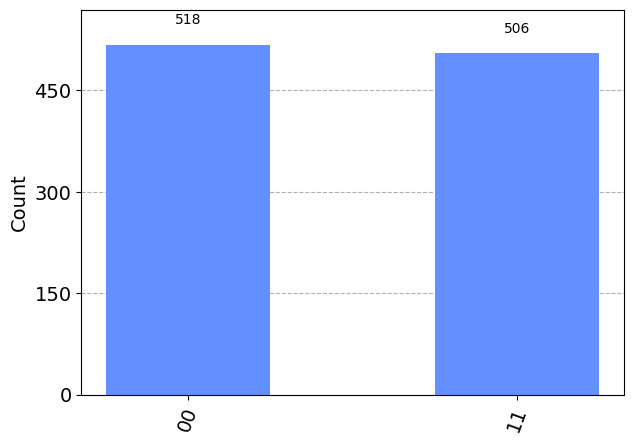

In [ ]:
plot_histogram(IdealStateVSimMeasurement())

P(01) = 0.025390625
P(10) = 0.021484375
P(00) = 0.474609375
P(11) = 0.478515625


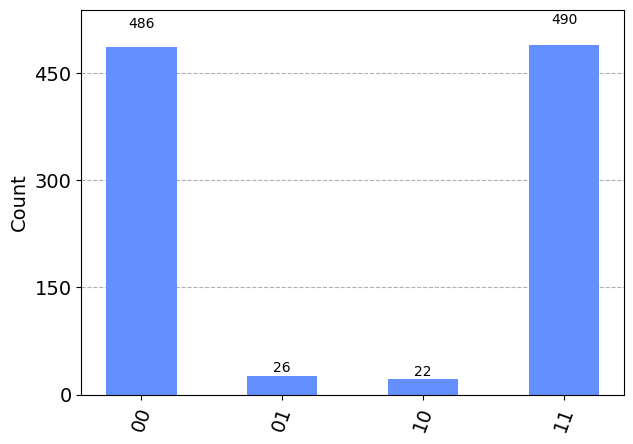

In [ ]:
plot_histogram(Noise())

In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[0]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘
Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j],
            dims=(2, 2))


In [ ]:
circuit = QuantumCircuit(q,c)

circuit.x(q[0]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate
circuit.measure(q,c) # Qubit Measurment

print(circuit)

     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


P(11) = 0.4853515625
P(00) = 0.5146484375


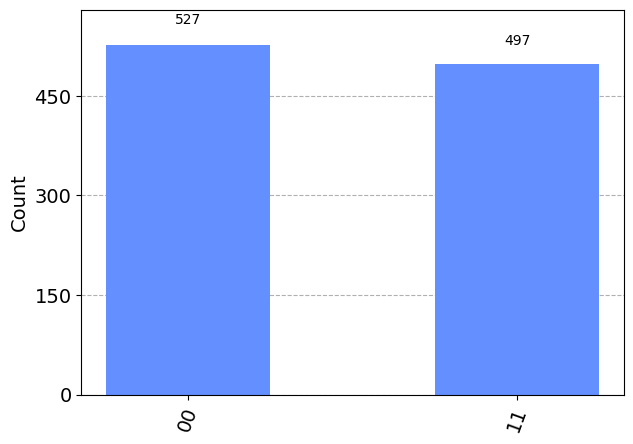

In [ ]:
plot_histogram(IdealStateVSimMeasurement())

P(01) = 0.021484375
P(10) = 0.0244140625
P(00) = 0.4775390625
P(11) = 0.4765625


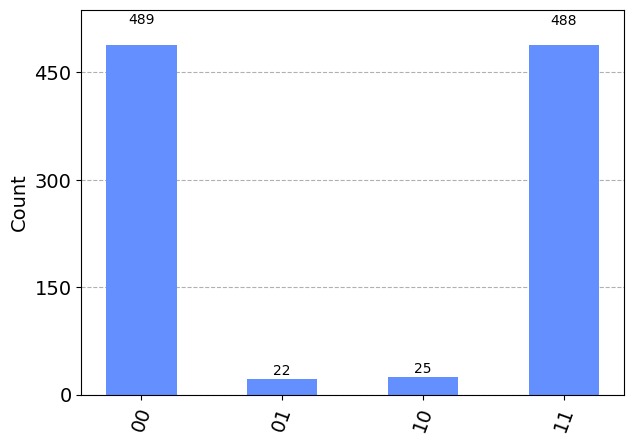

In [ ]:
plot_histogram(Noise())

In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [ ]:
circuit = QuantumCircuit(q,c)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.cx(q[0],q[1]) # CNOT gate
circuit.measure(q,c) # Qubit Measurment

print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


P(01) = 0.498046875
P(10) = 0.501953125


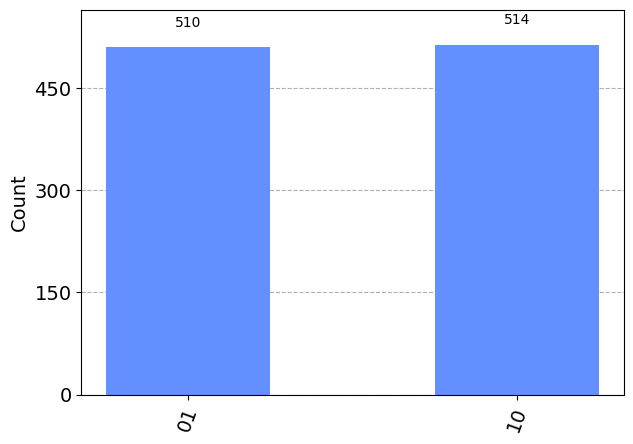

In [ ]:
plot_histogram(IdealStateVSimMeasurement())

P(11) = 0.0263671875
P(01) = 0.4765625
P(00) = 0.0185546875
P(10) = 0.478515625


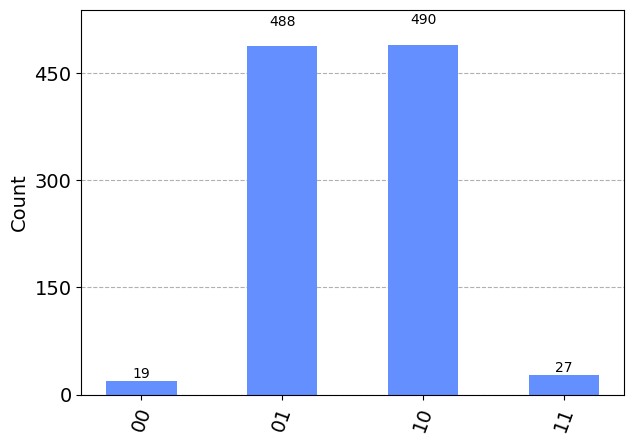

In [ ]:
plot_histogram(Noise())

In [ ]:
circuit = QuantumCircuit(q)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.z(q[0]) # Pauli-Z gate
circuit.z(q[1]) # Pauli-Z  gate
circuit.cx(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌───┐┌───┐     
q_0: ┤ H ├┤ Z ├──■──
     ├───┤├───┤┌─┴─┐
q_1: ┤ X ├┤ Z ├┤ X ├
     └───┘└───┘└───┘
Statevector([ 0.        +0.j,  0.70710678-0.j, -0.70710678+0.j,
             -0.        +0.j],
            dims=(2, 2))


In [ ]:
circuit = QuantumCircuit(q,c)

circuit.x(q[1]) # Pauli-X gate
circuit.h(q[0]) # Hadamard gate
circuit.z(q[0]) # Pauli-Z gate
circuit.z(q[1]) # Pauli-Z  gate
circuit.cx(q[0],q[1]) # CNOT gate
circuit.measure(q,c) # Qubit Measurment

print(circuit)

     ┌───┐┌───┐     ┌─┐   
q_0: ┤ H ├┤ Z ├──■──┤M├───
     ├───┤├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ Z ├┤ X ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


P(10) = 0.486328125
P(01) = 0.513671875


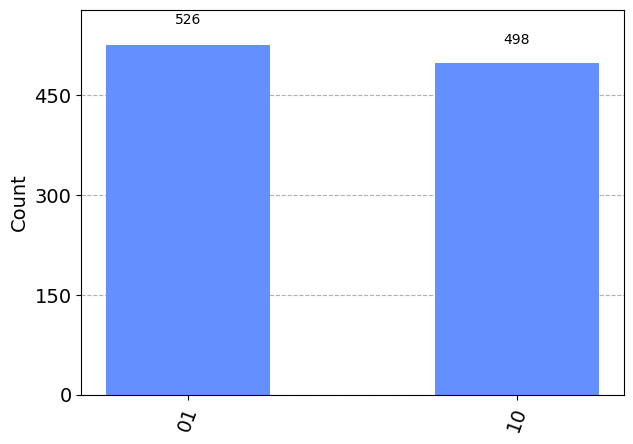

In [ ]:
plot_histogram(IdealStateVSimMeasurement())

P(11) = 0.03125
P(00) = 0.025390625
P(10) = 0.47265625
P(01) = 0.470703125


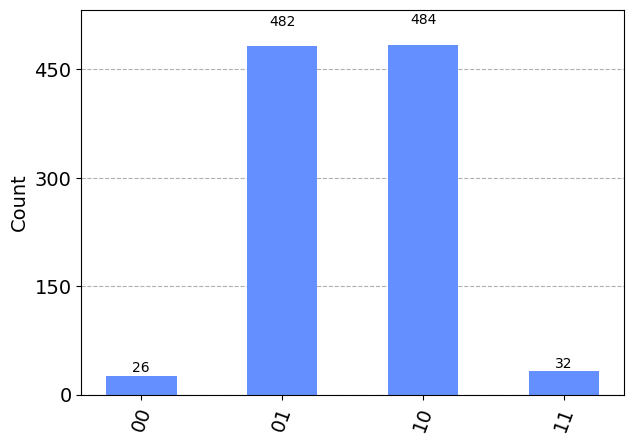

In [ ]:
plot_histogram(Noise())

An ideal state vector simulator assumes a perfect quantum system with no external influences. A state vector simulator with noise introduces disturbances that can affect the accuracy of calculations. The difference in results between the two is due to these disturbances, or “noise”. There is a differnce between our calculated statevector and ideal statevector simulator becuase of the inherent probabilistic nature of a quibit.

## Question 2
In the circuit from Fig. 2, take |ψ0⟩ = 1/√2
|0⟩ + 1/√2
|1⟩ and |ϕ0⟩ =3/5
|0⟩ +
4/5 |1⟩, Ua = T, Ub = Y and
U = CZ. Find the output state vector. Is the state separable? What is the probability to find the
second qubit in state |1⟩?

In [ ]:
psi0 = 1/np.sqrt(2) * np.array([1, 1])
phi0 = np.array([3/5, 4/5])

circuit = QuantumCircuit(q)

circuit.initialize(psi0, 0)
circuit.initialize(phi0, 1)
circuit.t(q[0]) # Pauli-X gate
circuit.y(q[1]) # Hadamard gate
circuit.cz(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌─────────────────────────────┐┌───┐   
q_0: ┤ Initialize(0.70711,0.70711) ├┤ T ├─■─
     └───┬─────────────────────┬───┘├───┤ │ 
q_1: ────┤ Initialize(0.6,0.8) ├────┤ Y ├─■─
         └─────────────────────┘    └───┘   
Statevector([0. -0.56568542j, 0.4-0.4j       , 0. +0.42426407j,
             0.3-0.3j       ],
            dims=(2, 2))


In [ ]:
circuit.initialize(psi0, 0)
circuit.initialize(phi0, 1)
circuit.t(q[0]) # Pauli-X gate
circuit.y(q[1]) # Hadamard gate
circuit.cz(q[0],q[1]) # CNOT gate

print(circuit)
IdealStateVSim()

     ┌─────────────────────────────┐┌───┐   ┌─────────────────────────────┐»
q_0: ┤ Initialize(0.70711,0.70711) ├┤ T ├─■─┤ Initialize(0.70711,0.70711) ├»
     └───┬─────────────────────┬───┘├───┤ │ └───┬─────────────────────┬───┘»
q_1: ────┤ Initialize(0.6,0.8) ├────┤ Y ├─■─────┤ Initialize(0.6,0.8) ├────»
         └─────────────────────┘    └───┘       └─────────────────────┘    »
«     ┌───┐   
«q_0: ┤ T ├─■─
«     ├───┤ │ 
«q_1: ┤ Y ├─■─
«     └───┘   
Statevector([-0.4-0.4j       ,  0. -0.56568542j,  0.3+0.3j       ,
             -0. -0.42426407j],
            dims=(2, 2))


In [ ]:
circuit = QuantumCircuit(q,c)

circuit.initialize(psi0, 0)
circuit.initialize(phi0, 1)
circuit.t(q[0]) # Pauli-X gate
circuit.y(q[1]) # Hadamard gate
circuit.cz(q[0],q[1]) # CNOT gate
circuit.measure(q,c) # Qubit Measurment

print(circuit)

     ┌─────────────────────────────┐┌───┐   ┌─┐   
q_0: ┤ Initialize(0.70711,0.70711) ├┤ T ├─■─┤M├───
     └───┬─────────────────────┬───┘├───┤ │ └╥┘┌─┐
q_1: ────┤ Initialize(0.6,0.8) ├────┤ Y ├─■──╫─┤M├
         └─────────────────────┘    └───┘    ║ └╥┘
c: 2/════════════════════════════════════════╩══╩═
                                             0  1 


P(11) = 0.1806640625
P(01) = 0.3037109375
P(10) = 0.193359375
P(00) = 0.322265625


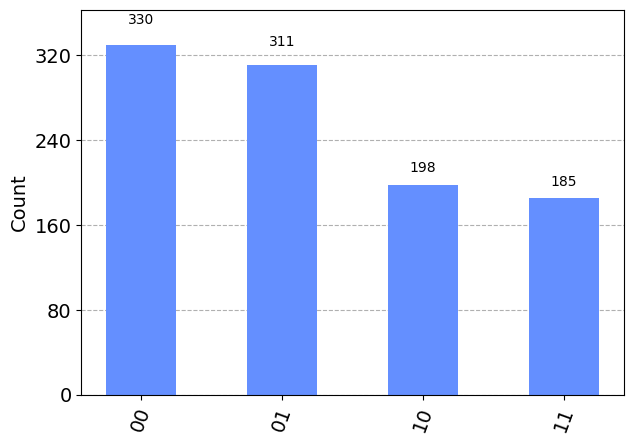

In [ ]:
plot_histogram(IdealStateVSimMeasurement())

P(11) = 0.1533203125
P(10) = 0.1982421875
P(00) = 0.3359375
P(01) = 0.3125


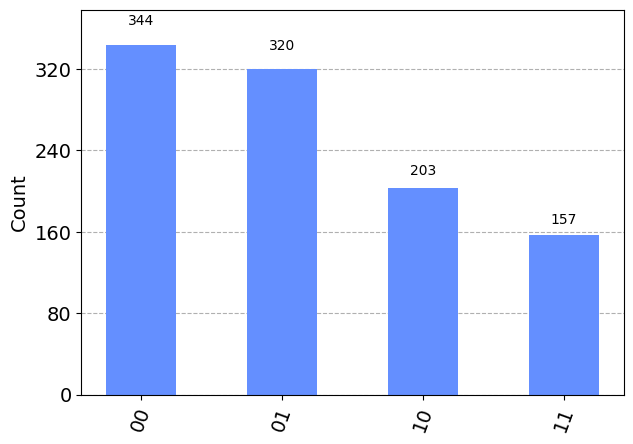

In [ ]:
plot_histogram(Noise())

-  The probabilty of finding the second quibit in state 1 without noise is 0.484 ~= 0.5
- The probability of finding the secondquibit in state 1 with noise is 0.465 ~= 0.5
<p>
There is a difference in result even comparing comparing the non numerical methods. In the hand calculated solution of the previuos assignment the values within the statevector were the same however the order of these values differ from the ones calulated by qiskit. This may just have been an error in hand matrix multiplication.


